<a href="https://colab.research.google.com/github/michelucci/zhaw-dlcourse-spring2019/blob/master/Additional%20Material%20-%20CNN/First_Example_of_a_CNN_(CIFAR10)_DL_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example of a CNN with the CIFAR10 dataset

Created on 24/4/2019 21:00

(C) Umberto Michelucci

## Import of libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from keras.optimizers import adam
from keras.callbacks import Callback

from keras.utils import np_utils # To transform labels in categorical
from keras.datasets import cifar10 # To load the dataset


import numpy as np
import matplotlib.pyplot as plt


from keras import backend as K
K.set_image_dim_ordering('tf') # To tell TensorFlow the right order of dims

# if using google colab and wants to upload or download files
from google.colab import files

Using TensorFlow backend.


In [0]:
# Just to set some standard plot format
import matplotlib as mpl
mpl.style.use('classic')

## Preparation of the data

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170500096/170498071 [==============================] - 8s 0us/step


In [0]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [0]:
nClasses = 10
y_train = np_utils.to_categorical(y_train,nClasses)
y_test = np_utils.to_categorical(y_test,nClasses)

In [6]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


## Neural Network Model

### Creation of the model

In [0]:
input_shape = (32,32,3)

In [0]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [9]:
K.clear_session()
model = createModel()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
AdamOpt = adam(lr=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

### ```CustomCallBack``` class for logging

In [0]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (epoch % 5 == 0):
          print ("Just finished epoch", epoch)
          print ("--------------------------------")
          print ('Loss evaluated on the validation dataset =',
                 logs.get('val_loss'))
          print ('Accuracy reached train is', 
                 logs.get('acc'))
          print ('Accuracy reached Val   is', 
                 logs.get('val_acc'))
          return

### Training of the network

In [0]:
batch_size = 256
epochs = 50

CC = CustomCallback()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    verbose=0, 
                    validation_data=(x_test, y_test),
          callbacks = [CC])

Instructions for updating:
Use tf.cast instead.
Just finished epoch 0
--------------------------------
Loss evaluated on the validation dataset = 1.4959655670166017
Accuracy reached train is 0.2864199999809265
Accuracy reached Val   is 0.4394
Just finished epoch 5
--------------------------------
Loss evaluated on the validation dataset = 0.8970609375
Accuracy reached train is 0.6494599999809265
Accuracy reached Val   is 0.6899
Just finished epoch 10
--------------------------------
Loss evaluated on the validation dataset = 0.7176825339317322
Accuracy reached train is 0.716839999961853
Accuracy reached Val   is 0.7543
Just finished epoch 15
--------------------------------
Loss evaluated on the validation dataset = 0.64702516040802
Accuracy reached train is 0.7492799999809265
Accuracy reached Val   is 0.7757
Just finished epoch 20
--------------------------------
Loss evaluated on the validation dataset = 0.6201654735565185
Accuracy reached train is 0.7679399999809265
Accuracy reached

## Plots

Text(0, 0.5, 'Loss')

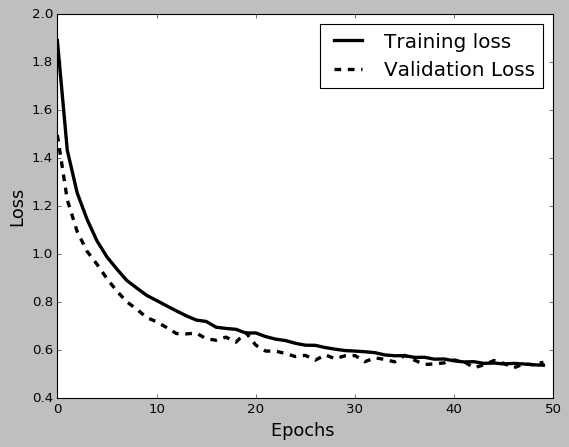

In [0]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)

#plt.savefig('loss.png', bbox_inches='tight', dpi = 300)
#files.download('loss.png')

Text(0, 0.5, 'Accuracy')

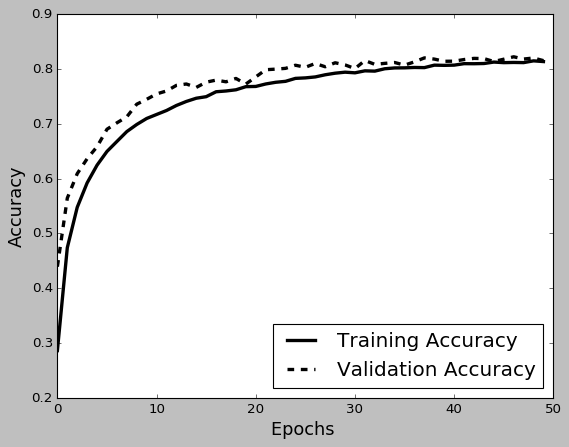

In [0]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'black',linewidth=3.0)
plt.plot(history.history['val_acc'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)

#plt.savefig('accuracy.png', bbox_inches='tight', dpi = 300)
#files.download('accuracy.png')